# Duomenų klasifikavimo laboratorinis darbas 1
#### Elijas Dapšauskas TSf-17

In [1]:
# Nustotomas grafikų dydis
options(repr.plot.width=8, repr.plot.height=4) 
# Fiksuojama atsitiktinių dydžių generatorių pradinė ("seed") reikšmė
set.seed(20200329)

In [2]:
library(MASS)

# 1.

In [3]:
piesti_kreive = function(f.eq0, plot.min, plot.max, add=F, col=1, lty=1) {
    x = y = seq(plot.min, plot.max, length=100)
    contour(x=x, y=x, z=outer(x, y, Vectorize(f.eq0)), las=1, drawlabels=F, lwd=3, levels=0, col=col, add=add, lty=lty)
}

### 1.2.

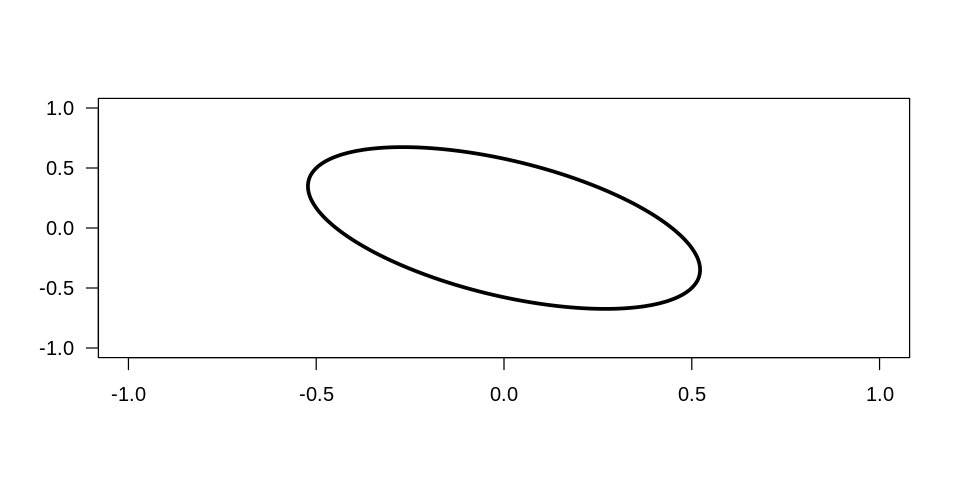

In [4]:
A11 = 5
A21 = A12 = 2
A22 = 3
c_ = 1
A = cbind(c(A11,A12), 
          c(A21,A22))

gauti_elipses_lygti = function(A,c_,m=c(0,0)) function(x,y) ((c(x,y)-m) %*% A %*% (c(x,y)-m)) - c_
piesti_kreive(f.eq0=gauti_elipses_lygti(A,c_), plot.min=-1, plot.max=1)

### 1.3.

In [5]:
n <- 1000
mu <- c(15, 3)
Sigma <- matrix(c(6, 3, 3, 3), ncol = 2, byrow = TRUE)
X <- mvrnorm(n, mu, Sigma)

##### a)

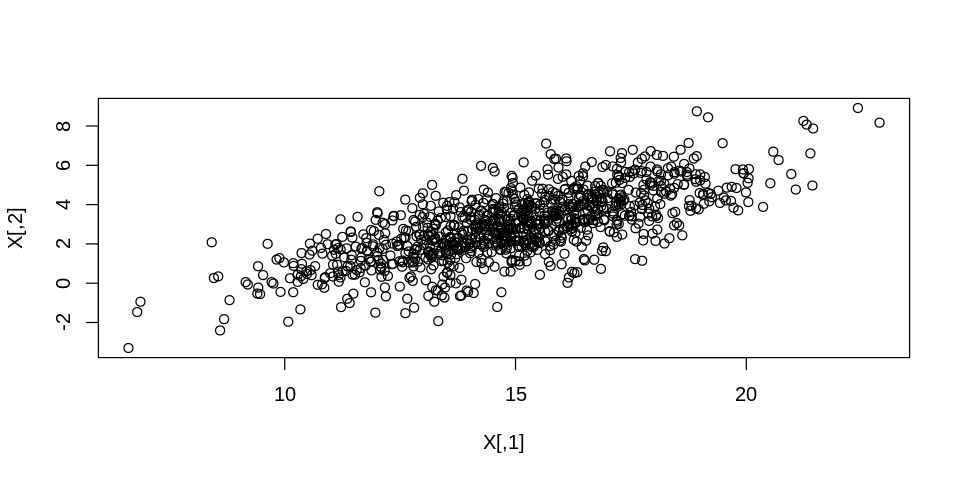

In [6]:
plot.1.3.a = function() {
    plot(X)
}
plot.1.3.a()

##### b)

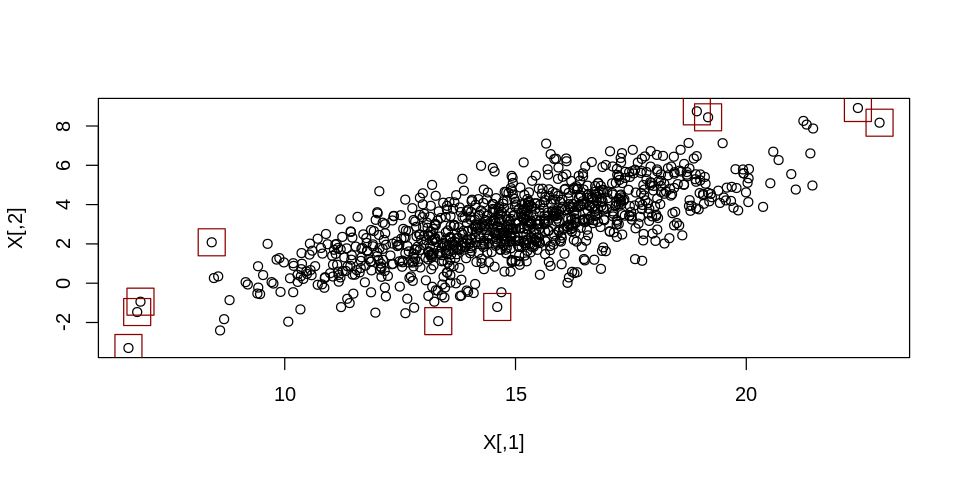

In [7]:
mu.est = c(mean(X[,1]), mean(X[,2]))
Sigma.est = cov(X)

kvadr_forma = function(x, mu, Sigma) t(x - mu) %*% solve(Sigma) %*% (x - mu)
rasti_mah_atstuma = function(x, mu, Sigma) sqrt(kvadr_forma(x, mu, Sigma))
X.atstumai = apply(X, 1, function(x) rasti_mah_atstuma(x, mu.est, Sigma.est))
X.top10 = X[head(sort(X.atstumai, index.return=TRUE, decreasing=T)$ix, 10),]

plot.1.3.b = function() {
    plot.1.3.a()
    points(X.top10, col='darkred', pch=0, cex=3)
}
plot.1.3.b()

##### c)

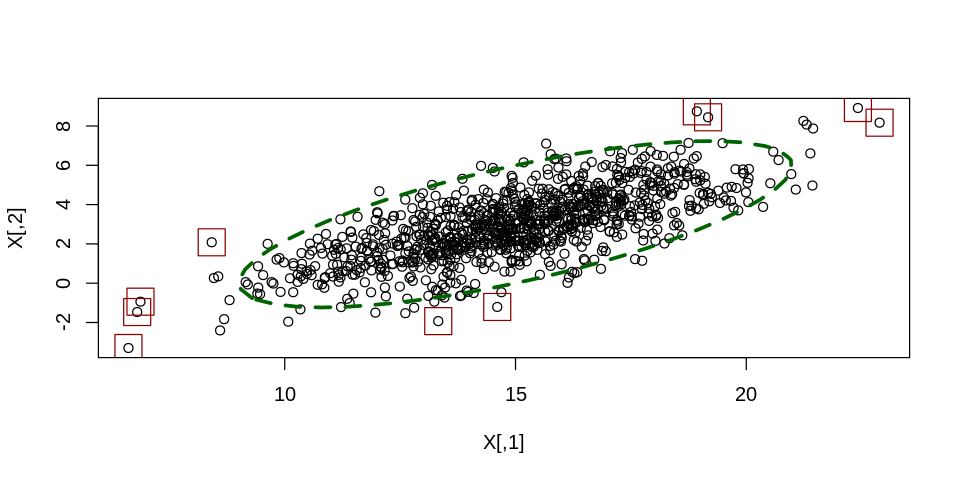

In [8]:
mu = c(15,3)
Sigma = cbind(c(6,3), c(3,3))
mah_atst_riba = function(lygmuo, df=2) sqrt(qchisq(lygmuo, df))

piesti_lygmens_kreive = function(lygmuo, col) {
    f.eq0 = function(x,y) rasti_mah_atstuma(c(x,y), mu, Sigma) - mah_atst_riba(lygmuo)
    piesti_kreive(f.eq0=f.eq0, col=col, lty=2, plot.min=-20, plot.max=30, add=T)
}
plot.1.3.c = function() {
    plot.1.3.b()
    piesti_lygmens_kreive(lygmuo=0.95, col='darkgreen')
}
plot.1.3.c()

##### d)

Už .95 lygmens yra 51 tšk.
Teoriškai turėtų būti 50 tšk.

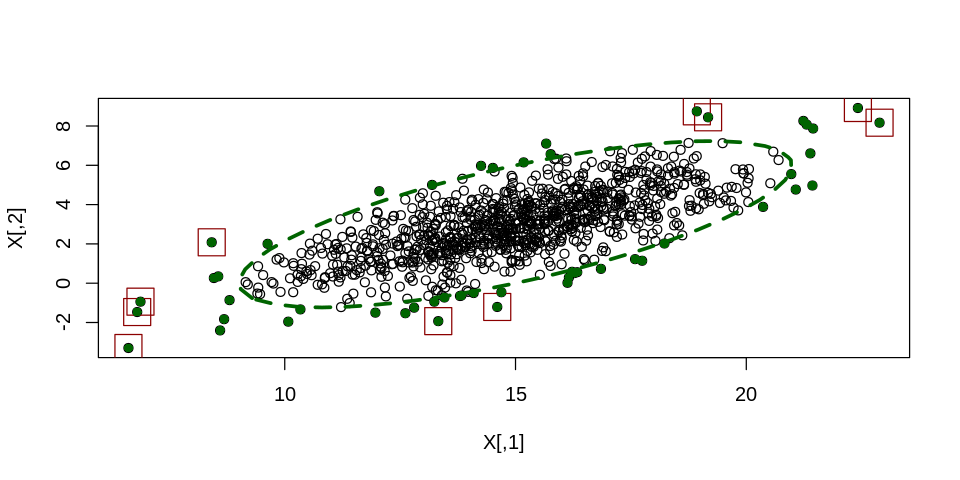

In [9]:
rasti_mah_atstumus = function(X) apply(X, 1, function(x) rasti_mah_atstuma(x, mu, Sigma))
X.uz_95_lygmens_ribos = X[rasti_mah_atstumus(X) >= mah_atst_riba(lygmuo=.95),]
cat("Už .95 lygmens yra", nrow(X.uz_95_lygmens_ribos), "tšk.")
                  
plot.1.3.d = function() {
    plot.1.3.c()
    points(X.uz_95_lygmens_ribos,col='darkgreen', pch=16)
}
plot.1.3.d()
                  
cat("\nTeoriškai turėtų būti", n*(1 - .95), "tšk.")

##### e)

In [10]:
X.elipses_isoreje = X[rasti_mah_atstumus(X) >= mah_atst_riba(lygmuo=.5),]
vid_mah_atstumas = mean(rasti_mah_atstumus(X.elipses_isoreje))

rasti_eukl_atstuma = function(x) norm(x - mu, type="2")
rasti_eukl_atstumus = function(X) apply(X, 1, function(x) rasti_eukl_atstuma(x))
vid_eukl_atstumas = mean(rasti_eukl_atstumus(X.elipses_isoreje))
                                        
cat('Vidutinis Mahalanobio atstumas:', vid_mah_atstumas)
cat('\nVidutinis Euklido atstumas:', vid_eukl_atstumas)
cat('\nIšvada: Vidutinis Mahalanobio atstumas yra mažesnis už Euklidinį.')

Vidutinis Mahalanobio atstumas: 1.816665
Vidutinis Euklido atstumas: 3.743423
Išvada: Vidutinis Mahalanobio atstumas yra mažesnis už Euklidinį.